<a href="https://colab.research.google.com/github/cydal/solarEnergyForecast/blob/main/solar_energy_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Source API - https://www.solar.sheffield.ac.uk/

## Sheffield Solar are collecting generation data from over 6000 PV installations all across the UK, both domestic and commercial.

In [1]:
#! pip install git+https://github.com/statsmodels/statsmodels.git


import numpy as np
import pandas as pd
import statsmodels.api as sm


from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


! pip install --upgrade git+https://github.com/SheffieldSolar/PV_Live-API

from pvlive_api import PVLive
from datetime import datetime
import pytz

  Cloning https://github.com/SheffieldSolar/PV_Live-API to /tmp/pip-req-build-aaf9yjiq
  Running command git clone -q https://github.com/SheffieldSolar/PV_Live-API /tmp/pip-req-build-aaf9yjiq
  Created wheel for pvlive-api: filename=pvlive_api-0.5-py2.py3-none-any.whl size=5783 sha256=5a8fc4904fc134dea0df525345ae0fd7e6e93007a40d39f0171f18919ca06c2e
  Stored in directory: /tmp/pip-ephem-wheel-cache-lm9ivq66/wheels/46/5c/ae/b7f2533e8d907b10cfcf5bf293178ed0e97251c0050576f2a7
Successfully built pvlive-api
  Found existing installation: pvlive-api 0.5
    Uninstalling pvlive-api-0.5:
      Successfully uninstalled pvlive-api-0.5


In [2]:
pvl = PVLive()

years = [2014, 2015, 2016, 2017, 2018, 2019]

data = []
for each in years:
  date_dt1 = pytz.utc.localize(datetime.strptime("{}-11-21T12:30:00Z".format(each), '%Y-%m-%dT%H:%M:%SZ'))
  date_dt2 = pytz.utc.localize(datetime.strptime("{}-11-21T11:30:00Z".format(each+1), '%Y-%m-%dT%H:%M:%SZ'))
  data.append(pvl.between(date_dt1, date_dt2))

In [4]:
flat_list = [halfhour for subdata in data for halfhour in subdata]

df = pd.DataFrame(flat_list, columns=["id", "date", "energy"])
df["date"] = pd.to_datetime(df["date"], format='%Y-%m-%dT%H:%M:%SZ')
df = df.drop(columns="id").set_index("date")
df = df.asfreq(freq='30T')

df = pd.DataFrame(df["energy"].ffill())

In [5]:
#df.to_csv("solar_energy.csv", index=False)

In [116]:
df

,energy
date,
2014-11-21 12:30:00,301.0
2014-11-21 13:00:00,297.0
2014-11-21 13:30:00,223.0
2014-11-21 14:00:00,171.0
2014-11-21 14:30:00,115.0
...,...
2020-11-21 09:30:00,437.0
2020-11-21 10:00:00,719.0
2020-11-21 10:30:00,955.0


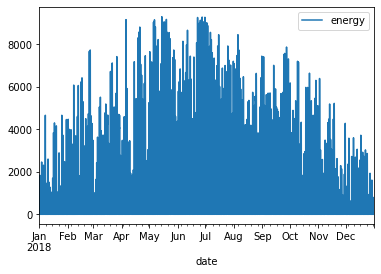

In [33]:
df[(df.index.year == 2018)].plot()

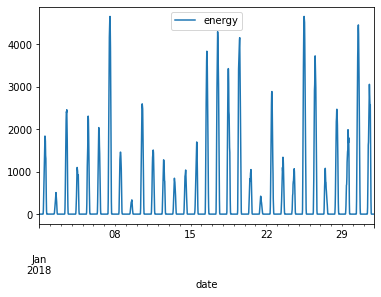

In [92]:
df[((df.index.year == 2018) & (df.index.month == 1))].plot()

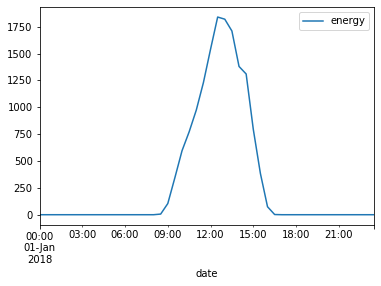

In [111]:
df[((df.index.year == 2018) & (df.index.month == 1) & (df.index.day == 1))].plot()

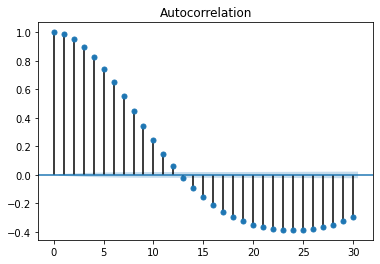

In [34]:
sm.graphics.tsa.plot_acf(df["energy"], lags=30)
plt.show()

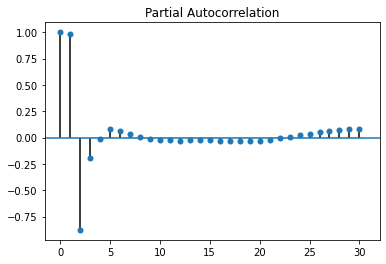

In [35]:
sm.graphics.tsa.plot_pacf(df["energy"], lags=30)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


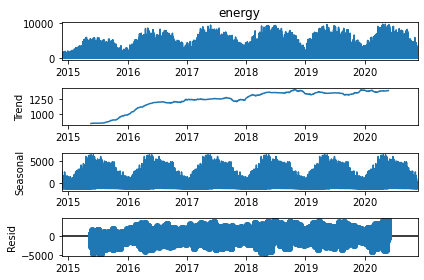

In [51]:
freq = 2*24*30*12
result = seasonal_decompose(df["energy"], model='additive', freq=freq)
result.plot()
pyplot.show()

In [39]:
from plotnine import ggplot, aes, geom_boxplot, facet_wrap, geom_line